In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']

# Visualizing Data

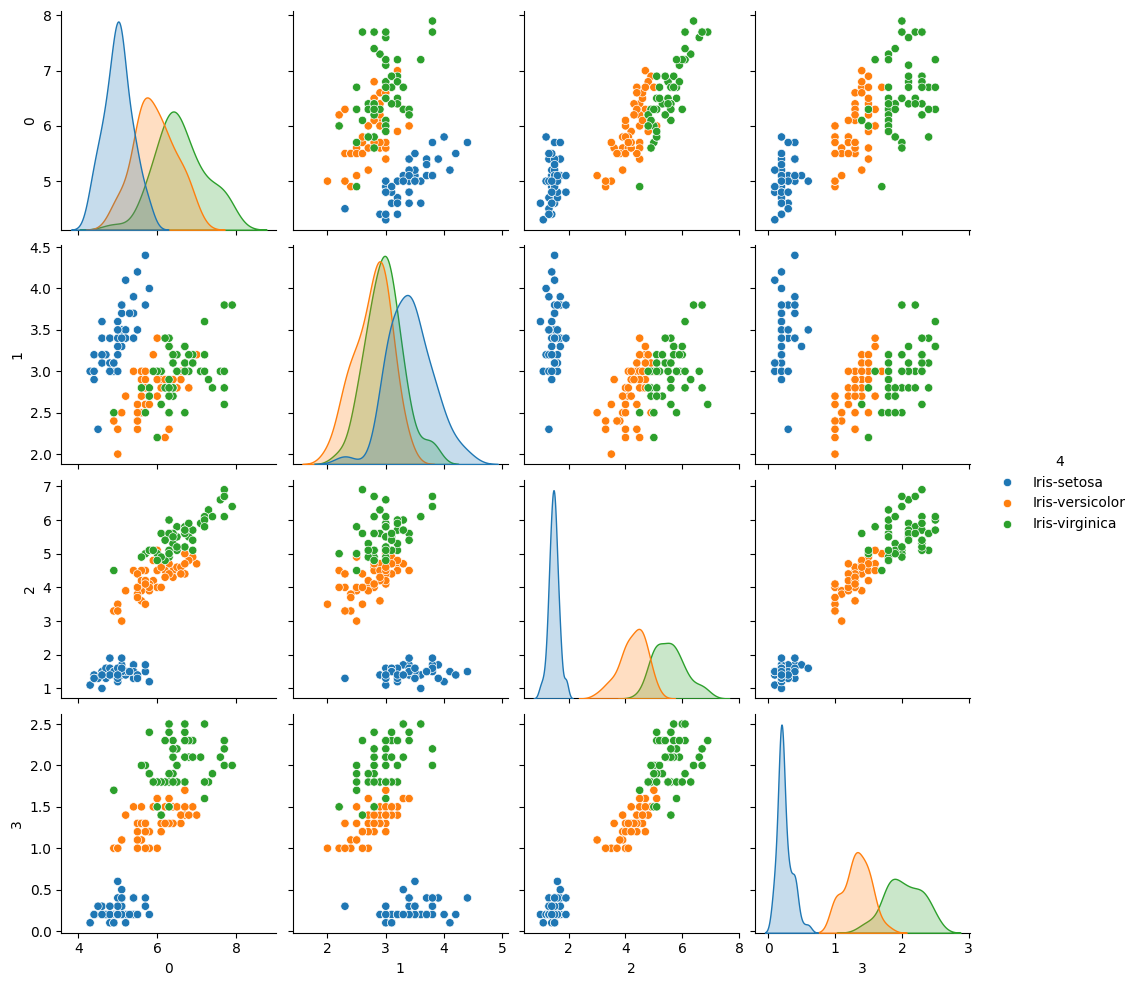

In [10]:
sns.pairplot(df, hue=4)

In [75]:
# separate features and labels
XX = df[["SepalLength", "SepalWidth"]]
YY = df['Species']

# Split the data into training and testing sets
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.20, random_state=569)

# Output the shapes of the resulting sets (optional)
XX_train.shape, XX_test.shape, YY_train.shape, YY_test.shape

((120, 2), (30, 2), (120,), (30,))

In [76]:
training_acc = []
testing_acc = []

# SGD Classifier - Hinge Loss

In [77]:
# Initialize the SGDClassifier model with the hinge loss function
sgd_hinge = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=569)

# Fit the model to the training data
sgd_hinge.fit(XX_train, YY_train)

# Predict on the training data
YY_train_pred = sgd_hinge.predict(XX_train)

# Predict on the testing data
YY_test_pred = sgd_hinge.predict(XX_test)

# Calculate and print the accuracy on the training data
accuracy_train = accuracy_score(YY_train, YY_train_pred)
training_acc.append({"sgd_hinge" :accuracy_train})
print(f"Training Accuracy: {accuracy_train:.4f}")

# Calculate and print the accuracy on the testing data
accuracy_test = accuracy_score(YY_test, YY_test_pred)
testing_acc.append({"sgd_hinge": accuracy_test})
print(f"Testing Accuracy: {accuracy_test:.4f}")

Training Accuracy: 0.7250
Testing Accuracy: 0.7667


# SGD - Modified Huber

In [78]:
# Initialize the SGDClassifier model with the modified Huber loss function
sgd_modified_huber = SGDClassifier(loss='modified_huber', max_iter=1000, tol=1e-3, random_state=569)

# Fit the model to the training data
sgd_modified_huber.fit(XX_train, YY_train)

# Predict on the training data
YY_train_pred = sgd_modified_huber.predict(XX_train)

# Predict on the testing data
YY_test_pred = sgd_modified_huber.predict(XX_test)

# Calculate and print the accuracy on the training data
accuracy_train = accuracy_score(YY_train, YY_train_pred)
training_acc.append({"sgd_modified_huber": accuracy_train})
print(f"Training Accuracy: {accuracy_train:.4f}")

# Calculate and print the accuracy on the testing data
accuracy_test = accuracy_score(YY_test, YY_test_pred)
testing_acc.append({"sgd_modified_huber": accuracy_test})
print(f"Testing Accuracy: {accuracy_test:.4f}")

Training Accuracy: 0.6083
Testing Accuracy: 0.7333


# Logistic Regression - lbfgs

In [79]:
# Initialize the Logistic Regression model with lbfgs function
logistic_model = LogisticRegression(C=1.0, solver='lbfgs', max_iter=100, random_state=569)

# Fit the model to the training data
logistic_model.fit(XX_train, YY_train)

# Predict on the training data
YY_pred = logistic_model.predict(XX_train)

# Predict on the testing data
YY_pred = logistic_model.predict(XX_test)

# Calculate and print the accuracy on the training data
accuracy_train = accuracy_score(YY_train, YY_train_pred)
training_acc.append({"logistic_lbfgs": accuracy_train})
print(f"Training Accuracy: {accuracy_train:.4f}")

# Calculate and print the accuracy on the testing data
accuracy_test = accuracy_score(YY_test, YY_test_pred)
testing_acc.append({"logistic_lbfgs": accuracy_test})
print(f"Testing Accuracy: {accuracy_test:.4f}")

Training Accuracy: 0.6083
Testing Accuracy: 0.7333


# SVM - Linear

In [80]:
# Initialize the SVM model with a linear kernel
svm_linear = SVC(kernel='linear', random_state=569)

# Fit the model to the training data
svm_linear.fit(XX_train, YY_train)

# Predict on the training data
YY_train_pred = svm_linear.predict(XX_train)

# Predict on the testing data
YY_test_pred = svm_linear.predict(XX_test)

# Calculate and print the accuracy on the training data
accuracy_train = accuracy_score(YY_train, YY_train_pred)
training_acc.append({"svm_linear": accuracy_train})
print(f"Training Accuracy: {accuracy_train:.4f}")

# Calculate and print the accuracy on the testing data
accuracy_test = accuracy_score(YY_test, YY_test_pred)
testing_acc.append({"svm_linear": accuracy_test})
print(f"Testing Accuracy: {accuracy_test:.4f}")

Training Accuracy: 0.7917
Testing Accuracy: 0.8667


# SVM - RBF

In [81]:
# Initialize the SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=569)

# Fit the model to the training data
svm_rbf.fit(XX_train, YY_train)

# Predict on the training data
YY_train_pred = svm_rbf.predict(XX_train)

# Predict on the testing data
YY_test_pred = svm_rbf.predict(XX_test)

# Calculate and print the accuracy on the training data
accuracy_train = accuracy_score(YY_train, YY_train_pred)
training_acc.append({"svm_rbf": accuracy_train})
print(f"Training Accuracy with SVM RBF: {accuracy_train:.4f}")

# Calculate and print the accuracy on the testing data
accuracy_test = accuracy_score(YY_test, YY_test_pred)
testing_acc.append({"svm_rbf": accuracy_test})
print(f"Testing Accuracy with SVM RBF: {accuracy_test:.4f}")

Training Accuracy with SVM RBF: 0.7833
Testing Accuracy with SVM RBF: 0.8667


# Decision Tree - Gini Impurity

In [82]:
# Initialize the Decision Tree model with Gini impurity
decision_tree = DecisionTreeClassifier(criterion='gini', random_state=569)

# Fit the model to the training data
decision_tree.fit(XX_train, YY_train)

# Predict on the training data
YY_train_pred = decision_tree.predict(XX_train)

# Predict on the testing data
YY_test_pred = decision_tree.predict(XX_test)

# Calculate and print the accuracy on the training data
accuracy_train = accuracy_score(YY_train, YY_train_pred)
training_acc.append({"decision_tree": accuracy_train})
print(f"Training Accuracy: {accuracy_train:.4f}")

# Calculate and print the accuracy on the testing data
accuracy_test = accuracy_score(YY_test, YY_test_pred)
testing_acc.append({"decision_tree": accuracy_test})
print(f"Testing Accuracy: {accuracy_test:.4f}")

Training Accuracy: 0.9417
Testing Accuracy: 0.7333


# Random Forest - Gini Impurity

In [83]:
# Initialize the Random Forest model with parameters of your choice
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=569)

# Fit the model to the training data
random_forest.fit(XX_train, YY_train)

# Predict on the training data
YY_train_pred = random_forest.predict(XX_train)

# Predict on the testing data
YY_test_pred = random_forest.predict(XX_test)

# Calculate and print the accuracy on the training data
accuracy_train = accuracy_score(YY_train, YY_train_pred)
training_acc.append({"random_forest": accuracy_train})
print(f"Training Accuracy: {accuracy_train:.4f}")

# Calculate and print the accuracy on the testing data
accuracy_test = accuracy_score(YY_test, YY_test_pred)
testing_acc.append({"random_forest": accuracy_test})
print(f"Testing Accuracy: {accuracy_test:.4f}")

Training Accuracy: 0.9417
Testing Accuracy: 0.7333


# KNN

In [84]:
# Choose two values for k
k_values = [3, 5]

for k in k_values:
    # Initialize the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model to the training data
    knn.fit(XX_train, YY_train)

    # Predict on the training data
    YY_train_pred = knn.predict(XX_train)

    # Predict on the testing data
    YY_test_pred = knn.predict(XX_test)

    # Calculate and store the accuracy on the training data
    accuracy_train = accuracy_score(YY_train, YY_train_pred)
    training_acc.append({f"knn_{k}": accuracy_train})

    # Calculate and store the accuracy on the testing data
    accuracy_test = accuracy_score(YY_test, YY_test_pred)
    testing_acc.append({f"knn_{k}": accuracy_test})
    
    print(f"K={k}: Training Accuracy = {accuracy_train:.4f}, Testing Accuracy = {accuracy_test:.4f}")

K=3: Training Accuracy = 0.8583, Testing Accuracy = 0.8000
K=5: Training Accuracy = 0.8083, Testing Accuracy = 0.8333


In [85]:
training_acc

[{'sgd_hinge': 0.725},
 {'sgd_modified_huber': 0.6083333333333333},
 {'logistic_lbfgs': 0.6083333333333333},
 {'svm_linear': 0.7916666666666666},
 {'svm_rbf': 0.7833333333333333},
 {'decision_tree': 0.9416666666666667},
 {'random_forest': 0.9416666666666667},
 {'knn_3': 0.8583333333333333},
 {'knn_5': 0.8083333333333333}]

In [86]:
testing_acc

[{'sgd_hinge': 0.7666666666666667},
 {'sgd_modified_huber': 0.7333333333333333},
 {'logistic_lbfgs': 0.7333333333333333},
 {'svm_linear': 0.8666666666666667},
 {'svm_rbf': 0.8666666666666667},
 {'decision_tree': 0.7333333333333333},
 {'random_forest': 0.7333333333333333},
 {'knn_3': 0.8},
 {'knn_5': 0.8333333333333334}]

# Visualizing Accuracies

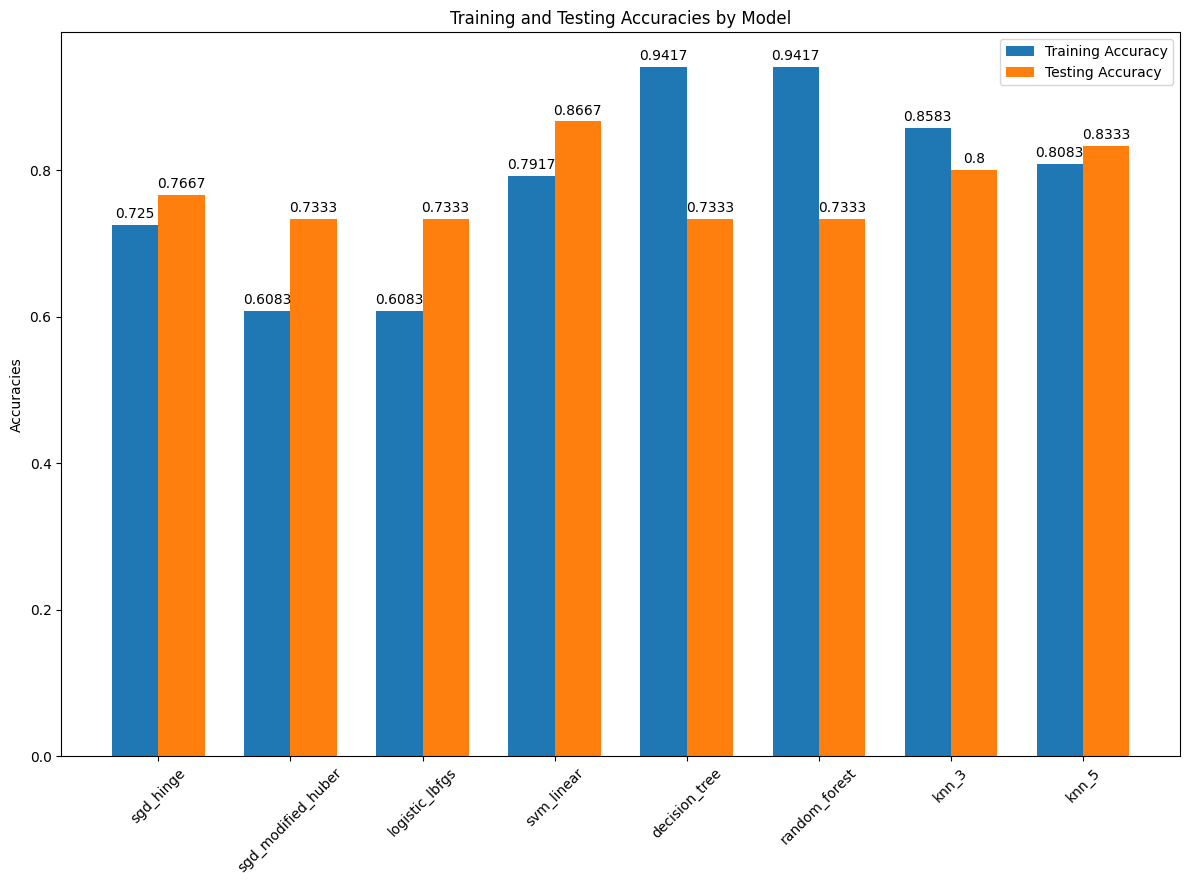

In [74]:
# Convert lists of dictionaries to single dictionaries
training_acc = {k: v for d in training_acc for k, v in d.items()}
testing_acc = {k: v for d in testing_acc for k, v in d.items()}

# Sorting the dictionaries for plotting
models = list(training_acc.keys())
training_scores = [training_acc[model] for model in models]
testing_scores = [testing_acc[model] for model in models]

# Set up the bar chart
x = range(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x, training_scores, width, label='Training Accuracy')
rects2 = ax.bar([p + width for p in x], testing_scores,
                width, label='Testing Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracies')
ax.set_title('Training and Testing Accuracies by Model')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(models)
ax.legend()

# Function to attach a text label above each bar in *rects*, displaying its height.


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# Call the function to label the bars
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Model Performance Analysis

### Stochastic Gradient Descent (SGD) with Hinge Loss
- **Training Accuracy**: 0.725
- **Testing Accuracy**: 0.7666

The SGD model with hinge loss shows decent performance, suggesting that the linear decision boundary is somewhat appropriate for the dataset. However, there's room for improvement, possibly through further parameter tuning.

### SGD with Modified Huber Loss
- **Training Accuracy**: 0.6083
- **Testing Accuracy**: 0.7333

This model appears to be underfitting, which could be due to the modified Huber loss's increased robustness to outliers, potentially at the cost of failing to capture the underlying data structure.

### Logistic Regression
- **Training Accuracy**: 0.6083
- **Testing Accuracy**: 0.7333

The logistic regression model shows the same pattern as the SGD with modified Huber loss, indicating underfitting but with a reasonable ability to generalize, as seen in the improved testing accuracy.

### SVM with Linear Kernel
- **Training Accuracy**: 0.7916
- **Testing Accuracy**: 0.8666

The linear kernel SVM performs well, particularly on the testing dataset, confirming that a linear decision boundary is suitable for this dataset.

### SVM with RBF Kernel
- **Training Accuracy**: 0.7833
- **Testing Accuracy**: 0.8666

The RBF kernel allows the SVM to capture more complex patterns in the dataset. The performance is similar to the linear SVM, suggesting that the additional complexity of the RBF kernel does not provide a significant advantage over the linear kernel for this data.

### Decision Tree with Gini Impurity
- **Training Accuracy**: 0.9416
- **Testing Accuracy**: 0.7333

High training accuracy with a drop in testing accuracy may suggest overfitting. The model might be too complex, capturing noise in the training dataset.

### Random Forest
- **Training Accuracy**: 0.9416
- **Testing Accuracy**: 0.7333

Surprisingly, the random forest has similar accuracy to the single decision tree. This is unusual because random forests typically improve generalization over single trees due to their ensemble nature.

### KNN with \( k = 3 \)
- **Training Accuracy**: 0.8583
- **Testing Accuracy**: 0.8

The KNN model with \( k = 3 \) has a slight drop from training to testing accuracy. This could indicate a relatively good balance but also suggests some sensitivity to the choice of \( k \).

### KNN with \( k = 5 \)
- **Training Accuracy**: 0.8083
- **Testing Accuracy**: 0.8333

A larger \( k \) generally reduces the impact of noise on the classification, but it can also smooth over details that are important. The increase in testing accuracy compared to \( k = 3 \) suggests that \( k = 5 \) may be a better choice for this dataset.

---

### Conclusions

The latest results present a diverse picture of model performance. The SVM with a linear and rbf kernel shows the best generalization capability among the models. Both KNN models perform well on testing data, with \( k = 5 \) providing a better balance between training and testing performance.

SGD models, both with hinge and modified Huber loss functions, and logistic regression appear to underfit the training data but still manage to provide reasonable accuracies on the testing data.

Both the decision tree and random forest models have identical accuracies in this set of results, which is odd. Normally, one would expect the random forest to outperform the single decision tree due to its nature of reducing overfitting.
